<a href="https://colab.research.google.com/github/NLZT/Deep-Dive-Projects/blob/main/Capstone_Agora_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
%%capture
!pip install geopandas

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.9

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [ ]:
%%capture
!pip install seaborn 

In [ ]:
%%capture
!pip install pyzipcode

In [ ]:
!sqlite3 --version

3.22.0 2018-01-22 18:45:57 0c55d179733b46d8d0ba4d88e01a25e10677046ee3da1d5b1581e86726f2alt1


In [ ]:
import csv
import pandas as pd
import numpy as np
import random
import re
import sqlite3
import plotly.express as px
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns
from pyzipcode import ZipCodeDatabase
pd.options.display.max_columns=1000
pd.options.display.max_rows=200

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
from wordcloud import WordCloud
#------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from IPython.display import display
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [ ]:
clean=!ls /drive/MyDrive/Agora_Data/Clean/*.csv
clean

['/drive/MyDrive/Agora_Data/Clean/answer_dict.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_Fields_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_Followup_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_IM_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_LL988_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_LLIM_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_SAL_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/callreports.csv',
 '/drive/MyDrive/Agora_Data/Clean/Call_Report_SRA_Clean.csv',
 '/drive/MyDrive/Agora_Data/Clean/category_dict.csv',
 '/drive/MyDrive/Agora_Data/Clean/CRF.csv',
 '/drive/MyDrive/Agora_Data/Clean/did.csv',
 '/drive/MyDrive/Agora_Data/Clean/subcategory_dict.csv']

In [ ]:
''.join(re.findall(r"Clean/(\S+).csv$",   '/drive/MyDrive/Agora_Data/Clean/Call_Report_LL988_Clean.csv'))

'Call_Report_LL988_Clean'

In [ ]:
x=[]
for i in clean:
  print(i)
  x.append(''.join(re.findall(r"Clean/(\S+).csv$", i)))
  # load data
  df = pd.read_csv(i)

  # strip whitespace from headers
  df.columns = df.columns.str.strip()

  con = sqlite3.connect("Agora")

  # drop data into database
  df.to_sql(''.join(re.findall(r"Clean/(\S+).csv$",i)), con)

  con.close()

/drive/MyDrive/Agora_Data/Clean/answer_dict.csv
/drive/MyDrive/Agora_Data/Clean/Call_Report_Clean.csv


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,9,10,26,27,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


/drive/MyDrive/Agora_Data/Clean/Call_Report_Fields_Clean.csv
/drive/MyDrive/Agora_Data/Clean/Call_Report_Followup_Clean.csv
/drive/MyDrive/Agora_Data/Clean/Call_Report_IM_Clean.csv
/drive/MyDrive/Agora_Data/Clean/Call_Report_LL988_Clean.csv
/drive/MyDrive/Agora_Data/Clean/Call_Report_LLIM_Clean.csv


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19,21,22,24,34,35,38,39,40,47,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/drive/MyDrive/Agora_Data/Clean/Call_Report_SAL_Clean.csv
/drive/MyDrive/Agora_Data/Clean/callreports.csv
/drive/MyDrive/Agora_Data/Clean/Call_Report_SRA_Clean.csv
/drive/MyDrive/Agora_Data/Clean/category_dict.csv
/drive/MyDrive/Agora_Data/Clean/CRF.csv


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,9,10,11,13,14,16,18,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,59,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,97,98,104,106,107,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,152,161,162,163,164,165,166,167,172,178,180,181,182,183,184,185,186,187,188,189,190,191,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/drive/MyDrive/Agora_Data/Clean/did.csv
/drive/MyDrive/Agora_Data/Clean/subcategory_dict.csv


In [ ]:
sql="""
SELECT DISTINCT name
FROM sqlite_master
WHERE type='table';
"""
tables = pd.read_sql_query(sql , sqlite3.connect("Agora"))
tables

,name
0,answer_dict
1,Call_Report_Clean
2,Call_Report_Fields_Clean
3,Call_Report_Followup_Clean
4,Call_Report_IM_Clean
5,Call_Report_LL988_Clean
6,Call_Report_LLIM_Clean
7,Call_Report_SAL_Clean
8,callreports
9,Call_Report_SRA_Clean


In [ ]:
sql="""
SELECT DISTINCT CallReportNum, PostalCode, CallDateAndTimeStart
FROM CRF

;"""
data = pd.read_sql_query(sql , sqlite3.connect("Agora"))
data

,CallReportNum,PostalCode,CallDateAndTimeStart
0,108546240,0,2022-10-27 15:20:00
1,108546674,0,2022-10-27 15:18:00
2,108542537,0,2022-10-27 14:09:00
3,108543244,0,2022-10-27 13:57:00
4,108540997,0,2022-10-27 13:40:00
...,...,...,...
179856,23298860,87112,2015-01-01 10:53:00
179857,23298338,79924,2015-01-01 10:12:00
179858,23298185,88240,2015-01-01 10:06:00
179859,23297833,87102,2015-01-01 08:51:00


In [ ]:
data['PostalCode'].value_counts()

0        123785
87031      3647
87106      1598
87110      1476
87108      1227
          ...  
44906         1
46923         1
72624         1
15461         1
95130         1
Name: PostalCode, Length: 11019, dtype: int64

In [ ]:
data['CallDateAndTimeStart'].value_counts()

2016-12-22 21:56:00    8
2017-11-20 21:27:00    8
2016-03-02 21:02:00    7
2016-12-28 18:30:00    6
2016-12-13 17:23:00    6
                      ..
2018-11-23 15:41:00    1
2018-11-23 15:40:00    1
2018-11-23 15:33:00    1
2018-11-23 14:45:00    1
2015-01-01 08:42:00    1
Name: CallDateAndTimeStart, Length: 169632, dtype: int64

In [ ]:
data=data[data['PostalCode']!=0]
data

,CallReportNum,PostalCode,CallDateAndTimeStart
27,108513664,97236,2022-10-26 22:49:00
29,108511031,68127,2022-10-26 20:26:00
54,108475307,70190,2022-10-26 07:33:00
59,108464889,32257,2022-10-25 20:17:00
67,108462023,88011,2022-10-25 18:18:00
...,...,...,...
179855,23298789,12550,2015-01-01 11:08:00
179856,23298860,87112,2015-01-01 10:53:00
179857,23298338,79924,2015-01-01 10:12:00
179858,23298185,88240,2015-01-01 10:06:00


In [ ]:
df=data['PostalCode'].value_counts()

In [ ]:
df

87031    3647
87106    1598
87110    1476
87108    1227
87102    1151
         ... 
46706       1
13842       1
87128       1
95482       1
95130       1
Name: PostalCode, Length: 11018, dtype: int64

In [ ]:
zcdb = ZipCodeDatabase() 

long_rep={}
lat_rep={}
hmm=[]
for i in data['PostalCode'].unique():
  try:
    lat_rep[i]=zcdb[i].latitude
    long_rep[i]=zcdb[i].longitude
  except:
    hmm.append(i)

In [ ]:
len(hmm)

709

In [ ]:
data['latitude']=data['PostalCode'].replace(lat_rep)
data['longitude']=data['PostalCode'].replace(long_rep)
data

<ipython-input-22-2e5f49f3e4e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latitude']=data['PostalCode'].replace(lat_rep)
<ipython-input-22-2e5f49f3e4e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['longitude']=data['PostalCode'].replace(long_rep)


,CallReportNum,PostalCode,CallDateAndTimeStart,latitude,longitude
27,108513664,97236,2022-10-26 22:49:00,45.474722,-122.509970
29,108511031,68127,2022-10-26 20:26:00,41.203029,-96.050090
54,108475307,70190,2022-10-26 07:33:00,30.032997,-89.882564
59,108464889,32257,2022-10-25 20:17:00,30.192434,-81.605970
67,108462023,88011,2022-10-25 18:18:00,32.312506,-106.703060
...,...,...,...,...,...
179855,23298789,12550,2015-01-01 11:08:00,41.521593,-74.040720
179856,23298860,87112,2015-01-01 10:53:00,35.100796,-106.520670
179857,23298338,79924,2015-01-01 10:12:00,31.901737,-106.418270
179858,23298185,88240,2015-01-01 10:06:00,32.707780,-103.166160


In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap


map_hooray = folium.Map(zoom_start = 13) 

# Ensure you're handing it floats
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
#heat_df = df_acc[df_acc['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = df_acc[df_acc['Year']=='2007'] # Reducing data size so it runs faster
heat_df = data[['latitude', 'longitude']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

<ipython-input-23-6704c102d32f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latitude'] = data['latitude'].astype(float)
<ipython-input-23-6704c102d32f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['longitude'] = data['longitude'].astype(float)


In [ ]:
locations = data[['latitude', 'longitude']]
locationlist = locations.values.tolist()

map = folium.Map()
for point in range(len(locationlist[:1000])):
    folium.Marker(locationlist[point]).add_to(map)
map

In [ ]:
data

,CallReportNum,PostalCode,CallDateAndTimeStart,latitude,longitude
27,108513664,97236,2022-10-26 22:49:00,45.474722,-122.509970
29,108511031,68127,2022-10-26 20:26:00,41.203029,-96.050090
54,108475307,70190,2022-10-26 07:33:00,30.032997,-89.882564
59,108464889,32257,2022-10-25 20:17:00,30.192434,-81.605970
67,108462023,88011,2022-10-25 18:18:00,32.312506,-106.703060
...,...,...,...,...,...
179855,23298789,12550,2015-01-01 11:08:00,41.521593,-74.040720
179856,23298860,87112,2015-01-01 10:53:00,35.100796,-106.520670
179857,23298338,79924,2015-01-01 10:12:00,31.901737,-106.418270
179858,23298185,88240,2015-01-01 10:06:00,32.707780,-103.166160


In [ ]:
sql="""
SELECT ReportVersion
FROM CRF

;"""
data = pd.read_sql_query(sql , sqlite3.connect("Agora"))
data

,ReportVersion
0,2
1,2
2,2
3,2
4,2
...,...
179856,2
179857,2
179858,2
179859,2


In [ ]:
data

,ReportVersion
0,2
1,2
2,2
3,2
4,2
...,...
179856,2
179857,2
179858,2
179859,2


In [ ]:
ReportVersion_Encode={0:'Follow-up Request', 1:'Lifeline/988 Report', 2:'Call Report', 3:'Lifeline-Instant Messaging', 4:'Suicide Risk Assessment', 5:'Lifeline/988 Report', 6:'Instant Messaging', 7:'Substance Abuse Line (SAL)'}
data['ReportVersion'] = data['ReportVersion'].replace(ReportVersion_Encode)
data

,ReportVersion
0,Call Report
1,Call Report
2,Call Report
3,Call Report
4,Call Report
...,...
179856,Call Report
179857,Call Report
179858,Call Report
179859,Call Report


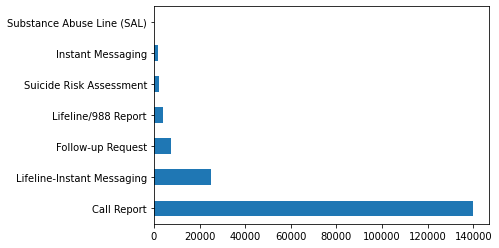

In [ ]:
data.ReportVersion.value_counts().plot(kind = 'barh')

In [ ]:
#sns.barplot(data['ReportVersion'].value_couts())

In [ ]:
sql="""
SELECT *
FROM Call_Report_Clean

;"""
data = pd.read_sql_query(sql , sqlite3.connect("Agora"))
data

,index,Unnamed: 0,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,PhoneWorkerName,PostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,EnteredOn,OrgNum,Caller Issues - Other,Caller Issues - Abuse,Caller Issues - Addictions or substance abuse,Caller Issues - Basic Needs,Caller Issues - Crime,Caller Issues - Grief or loss,Caller Issues - Mental Health,Caller Issues - Miscellaneous,Caller Issues - Relationships,Caller Issues - Suicide,Information - Call Type,Information - Caller Age,Information - Distress level at beginning,Information - Distress level at end,Information - Gender,Information - Method of Contact,Information - Military Affiliation,Information - Misc Call Type,Information - UNM Affiliation,Information - Was Call Type Follow up to Voice Mail?,Information - Who else might you have sought for help?,Referrals in or out - Number called in,Referrals in or out - Referrals given
0,0,0,108546240,2,2022-10-27 15:20:00,2022-10-27 15:24:00,4,Regard,0,Caller was looking for resources for her broth...,None,None,None,2022-10-27 15:30:47,2005,None,None,None,None,None,None,Other,None,None,None,Standard call,50-65,1.0,1.0,Female,Call,Not obtained,None,Not given,No,None,Agora Line,0
1,1,1,108546674,2,2022-10-27 15:18:00,2022-10-27 15:40:00,22,Three Days Grace,0,Caller immediately said that I was not to ask ...,I did not ask her demographics because I could...,None,None,2022-10-27 15:44:56,2005,Loneliness,None,None,None,None,None,Anxiety; Other,None,None,None,Standard call,Not given,6.0,4.0,Female,Call,Not obtained,None,Not given,No,None,Agora Line,0
2,2,2,108542537,2,2022-10-27 14:09:00,2022-10-27 14:39:00,30,Kali Uchis,0,Caller said she was an outcast to the human ra...,None,None,None,2022-10-27 14:42:26,2005,None,None,None,None,None,None,Other,Physical Health,Other; Family - other,None,Standard call,25-49,7.0,3.0,Female,Call,No,None,Non-Student,No,None,Agora Line,0
3,3,3,108543244,2,2022-10-27 13:57:00,2022-10-27 14:24:00,27,Three Days Grace,0,Whitney had a lot of anxiety and told me this ...,Whitney feels very persecuted and she's having...,None,None,2022-10-27 14:35:52,2005,Anger,None,None,None,None,Job loss,Anxiety,None,Other,None,Agora info,25-49,6.0,3.0,Female,Call,No,None,Non-Student,No,None,Agora Line,0
4,4,4,108540997,2,2022-10-27 13:40:00,2022-10-27 13:45:00,5,Regard,0,Caller could feel that she was starting an anx...,She was in a rush to get back to work so I did...,None,None,2022-10-27 13:53:03,2005,None,None,None,None,None,None,None,None,Other,None,Standard call,25-49,6.0,5.0,Female,Call,Not obtained,None,Not given,No,None,Agora Line,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139784,139784,179856,23298860,2,2015-01-01 10:53:00,2015-01-01 11:15:00,22,Chris Young,87112,None,None,None,None,2015-01-01 11:45:02,2005,None,None,None,None,None,None,Depression,None,None,None,Standard call,50-65,7,5,Female,Call,Not Armed Forces,None,Non-Student,No,I wouldnt have talked to anyone,Agora Line,0
139785,139785,179857,23298338,2,2015-01-01 10:12:00,2015-01-01 10:55:00,43,KAROL G,79924,None,None,None,None,2015-01-01 11:04:53,2005,None,None,None,None,None,None,None,Chat only,Family - other,None,Standard call,25-49,4,2,Female,Call,Not Armed Forces,None,Non-Student,No,I wouldnt have talked to anyone,Agora Line,0
139786,139786,179858,23298185,2,2015-01-01 10:06:00,2015-01-01 10:09:00,3,Chris Young,88240,None,None,None,None,2015-01-01 10:09:10,2005,None,None,None,None,None,None,Depression,None,None,Past suicide attempt(s),Standard call,19-24,4,1,Male,Call,Veteran of Armed Forces,None,Non-Student,No,I wouldnt have talked to anyone,Agora Line,1
139787,139787,179859,23297833,2,2015-01-01 08:51:00,2015-01-01 09:25:00,34,Chris Young,87102,None,None,None,None,2015-01-01 09:30:30,2005,None,None,Drugs,None,None,None,Depression,None,Parent or child,Worried about someone else,Standard call,25-49,8,

In [ ]:
demo=data[['CallDateAndTimeStart', 'PhoneWorkerName', 'CallLength','Information - Caller Age', 'Information - Gender', 'Information - Military Affiliation', 'Information - UNM Affiliation']]
demo

,CallDateAndTimeStart,PhoneWorkerName,CallLength,Information - Caller Age,Information - Gender,Information - Military Affiliation,Information - UNM Affiliation
0,2022-10-27 15:20:00,Regard,4,50-65,Female,Not obtained,Not given
1,2022-10-27 15:18:00,Three Days Grace,22,Not given,Female,Not obtained,Not given
2,2022-10-27 14:09:00,Kali Uchis,30,25-49,Female,No,Non-Student
3,2022-10-27 13:57:00,Three Days Grace,27,25-49,Female,No,Non-Student
4,2022-10-27 13:40:00,Regard,5,25-49,Female,Not obtained,Not given
...,...,...,...,...,...,...,...
139784,2015-01-01 10:53:00,Chris Young,22,50-65,Female,Not Armed Forces,Non-Student
139785,2015-01-01 10:12:00,KAROL G,43,25-49,Female,Not Armed Forces,Non-Student
139786,2015-01-01 10:06:00,Chris Young,3,19-24,Male,Veteran of Armed Forces,Non-Student
139787,2015-01-01 08:51:00,Chris Young,34,25-49,Male,Not Armed Forces,Non-Student


In [ ]:
demo['Information - UNM Affiliation'].value_counts()

Non-Student                                                      61443
Not given                                                        30435
Alumni                                                            6480
Current Undergrad                                                 2026
Alumni; Faculty or staff                                          1969
Current Undergrad; Non-Student                                     857
Alumni; Non-Student                                                828
Faculty or staff; Non-Student                                      828
Non-Student; Not given                                             825
Current Graduate Student                                           378
Faculty or staff                                                   377
Alumni; Current Undergrad                                           94
Alumni; Not given                                                   45
Alumni; Current Undergrad; Non-Student                              24
Alumni

In [ ]:
demo['CallLength'].describe()

count    139789.000000
mean         15.314288
std          20.170670
min           0.000000
25%           1.000000
50%           9.000000
75%          22.000000
max        1136.000000
Name: CallLength, dtype: float64

In [ ]:
123785-41509

82276

In [ ]:
demo['CallLength'].value_counts()

0       30291
1       11218
20       6523
2        5855
3        4476
5        3936
4        3650
21       3413
6        3037
10       2886
7        2778
8        2645
19       2564
15       2509
22       2502
9        2399
11       2368
18       2357
12       2277
16       2238
17       2163
14       2143
13       2137
23       1863
24       1789
25       1719
30       1615
26       1348
27       1289
28       1197
29       1127
31       1029
32       1008
35        951
33        906
34        846
40        823
36        784
37        709
38        706
42        647
39        646
41        638
45        612
43        562
44        541
50        535
47        490
46        481
48        457
60        405
49        395
52        385
51        383
53        370
54        338
55        329
58        312
56        298
57        294
59        267
62        240
61        238
63        223
64        215
65        212
66        183
67        155
70        153
68        152
69        141
75    

In [ ]:
calllength=[]
for i in sorted(demo['CallLength']):
  if i > 2 and i < 100:
    calllength.append(i)


In [ ]:
df=pd.DataFrame(calllength)

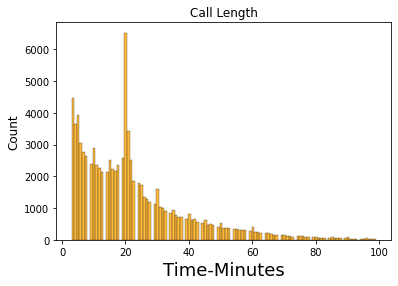

In [ ]:
sns.histplot(data=df, x=0, color='orange')
plt.title('Call Length')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Time-Minutes', fontsize=18)
plt.show()

In [ ]:
df

,0
0,3
1,3
2,3
3,3
4,3
...,...
91889,99
91890,99
91891,99
91892,99


In [ ]:
df.describe()

,0
count,91894.000000
mean,22.226108
std,17.041133
min,3.000000
25%,10.000000
50%,19.000000
75%,29.000000
max,99.000000


In [ ]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139789 entries, 0 to 139788
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   CallDateAndTimeStart                139789 non-null  object
 1   PhoneWorkerName                     139789 non-null  object
 2   CallLength                          139789 non-null  int64 
 3   Information - Caller Age            107149 non-null  object
 4   Information - Gender                107742 non-null  object
 5   Information - Military Affiliation  106682 non-null  object
 6   Information - UNM Affiliation       106705 non-null  object
dtypes: int64(1), object(6)
memory usage: 7.5+ MB


In [ ]:
#demo['CallDateAndTimeStart']=pd.to_datetime(demo['CallDateAndTimeStart'], format='%Y %m %d %H:%M')
#demo.info()

In [ ]:
demo

,CallDateAndTimeStart,PhoneWorkerName,CallLength,Information - Caller Age,Information - Gender,Information - Military Affiliation,Information - UNM Affiliation
0,2022-10-27 15:20:00,Regard,4,50-65,Female,Not obtained,Not given
1,2022-10-27 15:18:00,Three Days Grace,22,Not given,Female,Not obtained,Not given
2,2022-10-27 14:09:00,Kali Uchis,30,25-49,Female,No,Non-Student
3,2022-10-27 13:57:00,Three Days Grace,27,25-49,Female,No,Non-Student
4,2022-10-27 13:40:00,Regard,5,25-49,Female,Not obtained,Not given
...,...,...,...,...,...,...,...
139784,2015-01-01 10:53:00,Chris Young,22,50-65,Female,Not Armed Forces,Non-Student
139785,2015-01-01 10:12:00,KAROL G,43,25-49,Female,Not Armed Forces,Non-Student
139786,2015-01-01 10:06:00,Chris Young,3,19-24,Male,Veteran of Armed Forces,Non-Student
139787,2015-01-01 08:51:00,Chris Young,34,25-49,Male,Not Armed Forces,Non-Student


In [ ]:
date=[]
time=[]
for i in demo['CallDateAndTimeStart']:
  x=i.split(' ')
  date.append(x[0])
  time.append(x[1])

In [ ]:
demo['date']=date
demo['time']=time

<ipython-input-47-80d5940d1bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['date']=date
<ipython-input-47-80d5940d1bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['time']=time


In [ ]:
year=[]
month=[]
for i in demo['date']:
  x=i.split('-', 1)
  year.append(x[0])
  month.append(x[1])


In [ ]:
demo['year']=year
demo['month']=month

<ipython-input-49-3538a5fc62a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['year']=year
<ipython-input-49-3538a5fc62a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['month']=month


In [ ]:
demo

,CallDateAndTimeStart,PhoneWorkerName,CallLength,Information - Caller Age,Information - Gender,Information - Military Affiliation,Information - UNM Affiliation,date,time,year,month
0,2022-10-27 15:20:00,Regard,4,50-65,Female,Not obtained,Not given,2022-10-27,15:20:00,2022,10-27
1,2022-10-27 15:18:00,Three Days Grace,22,Not given,Female,Not obtained,Not given,2022-10-27,15:18:00,2022,10-27
2,2022-10-27 14:09:00,Kali Uchis,30,25-49,Female,No,Non-Student,2022-10-27,14:09:00,2022,10-27
3,2022-10-27 13:57:00,Three Days Grace,27,25-49,Female,No,Non-Student,2022-10-27,13:57:00,2022,10-27
4,2022-10-27 13:40:00,Regard,5,25-49,Female,Not obtained,Not given,2022-10-27,13:40:00,2022,10-27
...,...,...,...,...,...,...,...,...,...,...,...
139784,2015-01-01 10:53:00,Chris Young,22,50-65,Female,Not Armed Forces,Non-Student,2015-01-01,10:53:00,2015,01-01
139785,2015-01-01 10:12:00,KAROL G,43,25-49,Female,Not Armed Forces,Non-Student,2015-01-01,10:12:00,2015,01-01
139786,2015-01-01 10:06:00,Chris Young,3,19-24,Male,Veteran of Armed Forces,Non-Student,2015-01-01,10:06:00,2015,01-01
139787,2015-01-01 08:51:00,Chris Young,34,25-49,Male,Not Armed Forces,Non-Student,2015-01-01,08:51:00,2015,01-01


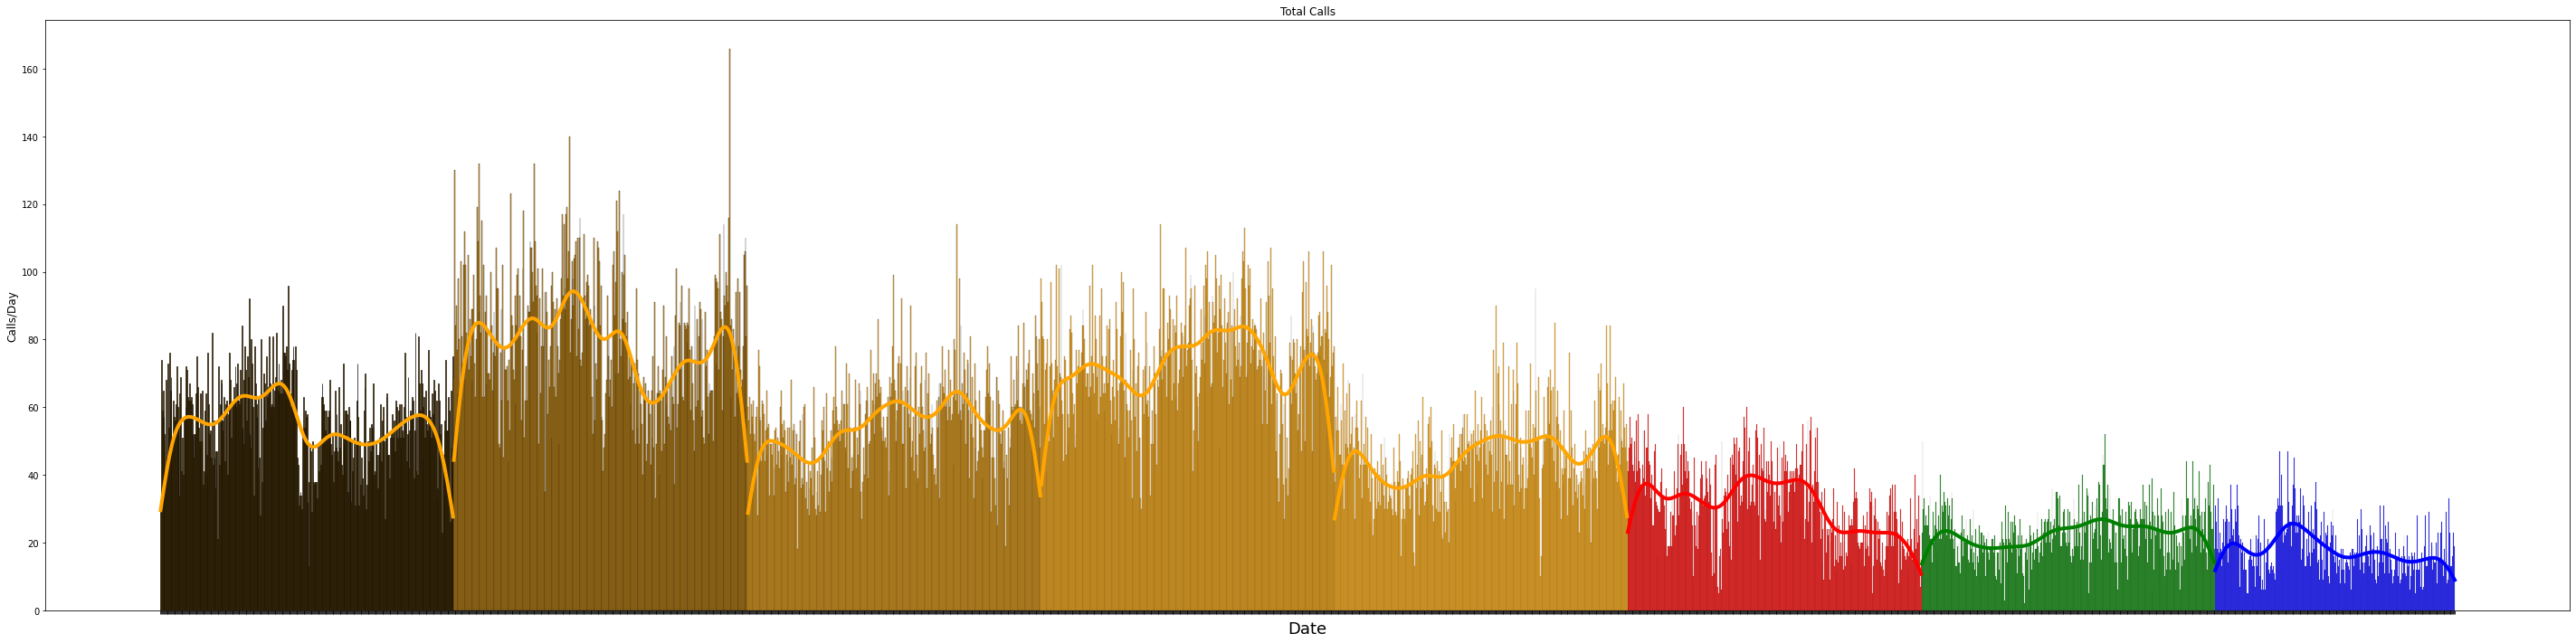

In [ ]:
pic=demo.sort_values('year')

pic2015=pic[pic['year']=='2015']
pic2016=pic[pic['year']=='2016']
pic2018=pic[pic['year']=='2017']
pic2017=pic[pic['year']=='2018']
pic2019=pic[pic['year']=='2019']
pic2020=pic[pic['year']=='2020']
pic2021=pic[pic['year']=='2021']
pic2022=pic[pic['year']=='2022']

plt.figure(figsize=(50,12))
ax=sns.histplot(x=pic2015['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="orange")
ax=sns.histplot(x=pic2016['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="orange")
ax=sns.histplot(x=pic2017['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="orange")
ax=sns.histplot(x=pic2018['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="orange")
ax=sns.histplot(x=pic2019['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="orange")
ax=sns.histplot(x=pic2020['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="red")
ax=sns.histplot(x=pic2021['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="green")
ax=sns.histplot(x=pic2022['date'], alpha=0.8, kde=True, bins=10,
            line_kws={'lw':4}, color="blue")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Total Calls')
plt.ylabel('Calls/Day', fontsize=12)
plt.xlabel('Date', fontsize=18)
plt.show()

In [ ]:
print(len(pic2015))
print(len(pic2016))
print(len(pic2017))
print(len(pic2018))
print(len(pic2019))
print(len(pic2020))
print(len(pic2021))
print(len(pic2022))

20480
29348
20338
26969
16911
11676
8540
5527


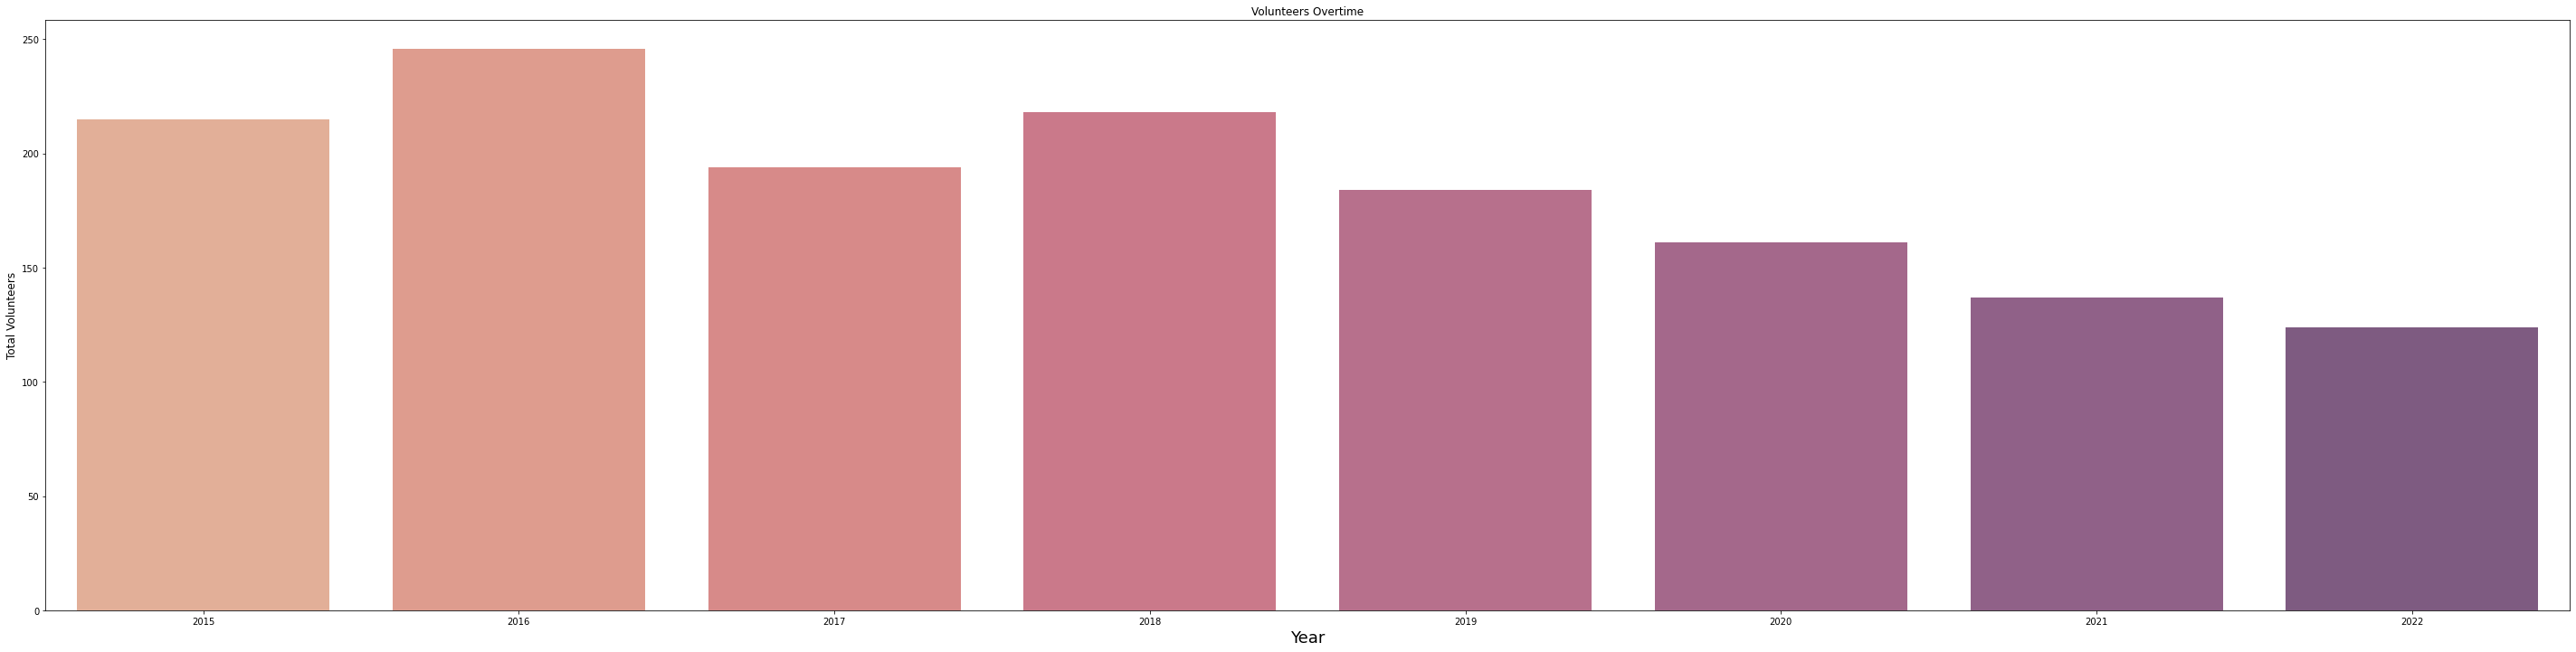

In [ ]:
vols= [215,246,194,218,184,161,137,124]
year= [2015,2016,2017,2018,2019,2020,2021,2022]


plt.figure(figsize=(50,12))
sns.barplot(x=year, y=vols, alpha=0.8, 
            palette="flare", order=year)
plt.title('Volunteers Overtime')
plt.ylabel('Total Volunteers', fontsize=12)
plt.xlabel('Year', fontsize=18)
plt.show()

In [ ]:
29348/246

119.30081300813008

In [ ]:
5527/124

44.57258064516129

Text(0.5, 0, 'Total Calls/Year')

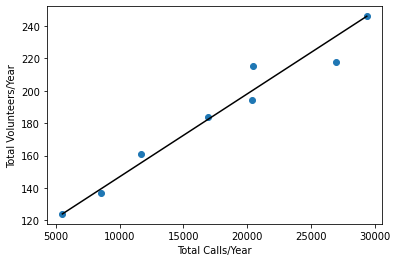

In [ ]:
total_calls=[20480,29348,20338,26969,16911,11676,8540,5527]
vols= [215,246,194,218,184,161,137,124]

plt.scatter(total_calls, vols)
plt.plot([min(total_calls), max(total_calls)],[min(vols), max(vols)], c='black')
plt.ylabel('Total Volunteers/Year')
plt.xlabel('Total Calls/Year')

In [ ]:
sql="""
SELECT *
FROM Call_Report_LLIM_Clean

;"""
data = pd.read_sql_query(sql , sqlite3.connect("Agora"))
data

,index,Unnamed: 0,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,PhoneWorkerName,PostalCode,Narrative,TextField2,TextField3,EnteredOn,OrgNum,Center Information - Counselor Response Time,Center Information - Visitor Exit Time,IM Demographics - Age,Center Information - Chat Answered,Center Information - Handling Center,Center Information - Type of Chat,Disaster Related Information - Was the primary concern of this chat,IM Demographics - Do you have thoughts of suicide?,IM Demographics - Has a family member served in the military - past or present?,IM Demographics - Have you served in the military - past or present?,IM Demographics - How upset are you? [Scale of 1-5],IM Demographics - Race/Ethnicity,IM Demographics - What is your gender identity (how you define yourself)?,IM Demographics - What is your main concern?,Post-Chat Survey - Agitated,Post-Chat Survey - Alone,Post-Chat Survey - Confident and in control,Post-Chat Survey - Depressed,Post-Chat Survey - Did you and your chat counselor agree on any plans for after the call (like things you can do or someone you can contact)?,Post-Chat Survey - Did you find this chat service helpful?,Post-Chat Survey - Hopeful,Post-Chat Survey - I didnt have anyone else I could trust with my problem,Post-Chat Survey - I don't have access to a professional counselor,Post-Chat Survey - I feel my chat counselor understood me,Post-Chat Survey - I feel my chat counselor was genuinely concerned for my well-being,Post-Chat Survey - I have used the chat service before,Post-Chat Survey - I wanted help from someone who doesn't know me personally,Post-Chat Survey - I'm more comfortable chatting online than talking to someone in person or on the phone,Post-Chat Survey - If NO why not?,Post-Chat Survey - If yes how helpful?,Post-Chat Survey - If YES how likely are you to follow these plans?,Post-Chat Survey - Now that you have finished your chat session how are you feeling?,Post-Chat Survey - Overwhelmed,Post-Chat Survey - Suicidal,Post-Chat Survey - The people I talk to about problems are not currently available,Post-Chat Survey - What is your gender identity (how you define yourself)?,Post-Chat Survey - What is your sexual orientation?,Post-Chat Survey - What was your sex at birth (as originally listed on your birth certificate)?,Suicidal/Homicidal Risk Assessment - Was emergency rescue dispatched?,Suicidal/Homicidal Risk Assessment - Was homicidal ideation (any desire or threat of violence to others) present?,Suicidal/Homicidal Risk Assessment - Was suicidal ideation present?,Suicidal/Homicidal Risk Assessment - Was user at imminent risk for suicide?
0,0,26255,75278566,3,2020-06-14 18:01:00,2020-06-14 20:57:00,176,Chance the Rapper,78756,Anonymous7682 6:01 PM ET: Thank you for loggin...,Chatter came on today to discuss the affects o...,I'm not sure how to deal with cutting talk or ...,2020-06-14 20:58:04,2388,76.0,10516.0,30,Yes,Agora Crisis Center,Engaged,None of the above chat not related to COVID-19,Yes - Current (within the past 24 hours),Yes - A family member serves/has served in the...,No - I have not served in the US military,5 - Extremely upset,Other,Decline to answer,Self-harm,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No chat ended unexpectedly/werent able to loca...,Yes - Recent Past (within the past two months),Yes - Current (within the past 24 hours),Yes
1,1,26291,75236216,3,2020-06-12 22:34:00,2020-06-12 22:35:00,1,iann dior,10604,Beverly OKeeffe 9:34 PM ET: Thank you for logg...,None,None,2020-06-12 23:10:02,2388,2150.0,None,61,Yes,Agora Crisis Center,Not Answered (not answered within 15 minutes),None,Yes - Current (within the past 24 hours),No - A family member has not served in the US ...,No - I have not served in the US military,4 - Very upset,Caucasian/White,Transgender female,Depression,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,N

In [ ]:
data['Narrative'][276]

In [ ]:
treet=data[['Center Information - Chat Answered', 'Center Information - Type of Chat', 'IM Demographics - Do you have thoughts of suicide?','IM Demographics - Has a family member served in the military - past or present?','IM Demographics - Have you served in the military - past or present?',
'IM Demographics - How upset are you? [Scale of 1-5]','IM Demographics - Race/Ethnicity','IM Demographics - What is your gender identity (how you define yourself)?','IM Demographics - What is your main concern?',
'Post-Chat Survey - I didnt have anyone else I could trust with my problem', "Post-Chat Survey - I don't have access to a professional counselor",'Post-Chat Survey - I have used the chat service before', "Post-Chat Survey - I wanted help from someone who doesn't know me personally",
"Post-Chat Survey - I'm more comfortable chatting online than talking to someone in person or on the phone", "Post-Chat Survey - The people I talk to about problems are not currently available", "Post-Chat Survey - What is your sexual orientation?", "Suicidal/Homicidal Risk Assessment - Was emergency rescue dispatched?",
"Suicidal/Homicidal Risk Assessment - Was homicidal ideation (any desire or threat of violence to others) present?", "Suicidal/Homicidal Risk Assessment - Was suicidal ideation present?", "Suicidal/Homicidal Risk Assessment - Was user at imminent risk for suicide?"

]]







In [ ]:
tree_dum=pd.get_dummies(treet)
tree_dum

,Center Information - Chat Answered_No,Center Information - Chat Answered_Yes,Center Information - Type of Chat_Abandoned (answered within 15 minutes),Center Information - Type of Chat_Collaborative Queue Overflow,Center Information - Type of Chat_Engaged,Center Information - Type of Chat_Not Answered (not answered within 15 minutes),Center Information - Type of Chat_Test/role-play,IM Demographics - Do you have thoughts of suicide?_No,IM Demographics - Do you have thoughts of suicide?_Yes - Current (within the past 24 hours),IM Demographics - Do you have thoughts of suicide?_Yes - Recent Past (within the past few days),IM Demographics - Has a family member served in the military - past or present?_No - A family member has not served in the US military,IM Demographics - Has a family member served in the military - past or present?_Prefer not to answer,IM Demographics - Has a family member served in the military - past or present?_Yes - A family member serves/has served in the US military,IM Demographics - Have you served in the military - past or present?_No - I have not served in the US military,IM Demographics - Have you served in the military - past or present?_Prefer not to answer,IM Demographics - Have you served in the military - past or present?_Yes - I am currently on Active Duty,IM Demographics - Have you served in the military - past or present?_Yes-I am in National Guard/Reserves but not currently activated,IM Demographics - Have you served in the military - past or present?_Yes-I have previously served in the US military,IM Demographics - How upset are you? [Scale of 1-5]_1 - I'm doing OK,IM Demographics - How upset are you? [Scale of 1-5]_2 - A little upset,IM Demographics - How upset are you? [Scale of 1-5]_3 - Moderately upset,IM Demographics - How upset are you? [Scale of 1-5]_4 - Very upset,IM Demographics - How upset are you? [Scale of 1-5]_5 - Extremely upset,IM Demographics - Race/Ethnicity_African American/Black,IM Demographics - Race/Ethnicity_Asian,IM Demographics - Race/Ethnicity_Caucasian/White,IM Demographics - Race/Ethnicity_Hispanic/Latino,IM Demographics - Race/Ethnicity_Native American / Alaska Native,IM Demographics - Race/Ethnicity_Native Hawaiian / Other Pacific Islander,IM Demographics - Race/Ethnicity_Other,IM Demographics - Race/Ethnicity_Prefer not to answer,IM Demographics - Race/Ethnicity_Two or more of above,IM Demographics - What is your gender identity (how you define yourself)?_Decline to answer,IM Demographics - What is your gender identity (how you define yourself)?_Female,IM Demographics - What is your gender identity (how you define yourself)?_Male,IM Demographics - What is your gender identity (how you define yourself)?_Other,IM Demographics - What is your gender identity (how you define yourself)?_Questioning,IM Demographics - What is your gender identity (how you define yourself)?_Transgender female,IM Demographics - What is your gender identity (how you define yourself)?_Transgender male,IM Demographics - What is your main concern?_Addictions,IM Demographics - What is your main concern?_Anxiety,IM Demographics - What is your main concern?_Bullying/Problems in School,IM Demographics - What is your main concern?_Depression,IM Demographics - What is your main concern?_Eating Disorder,IM Demographics - What is your main concern?_Family Issues,IM Demographics - What is your main concern?_Financial Issues,IM Demographics - What is your main concern?_Other,IM Demographics - What is your main concern?_Physical Health,IM Demographics - What is your main concern?_Physical Sexual and/or Emotional Abuse,IM Demographics - What is your main concern?_Relationship Issues/Violence,IM Demographics - What is your main concern?_Self-harm,IM Demographics - What is your main concern?_Sexuality,Post-Chat Survey - I didnt have anyone else I could trust with my problem_No,Post-Chat Survey - I didnt have anyone else I could trust with my problem_Yes,Post-Chat Survey - I don't have access to a profession

In [ ]:
tree_cont=data[['CallLength', 'Narrative', 'Center Information - Counselor Response Time', 'Center Information - Visitor Exit Time']]
tree_cont['Narrative'].fillna('', inplace=True)
nar_len=[len(i) for i in tree_cont['Narrative']]
tree_cont['Narrative']=nar_len
tree_cont

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-59-3e8d685e063c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_cont['Narrative']=nar_len


,CallLength,Narrative,Center Information - Counselor Response Time,Center Information - Visitor Exit Time
0,176,38654,76.0,10516.0
1,1,657,2150.0,None
2,1,1057,1509.0,None
3,1,888,1445.0,375.0
4,84,8209,11.0,None
...,...,...,...,...
24945,8,616,482.0,215
24946,22,1080,747.0,None
24947,44,7604,197.0,None
24948,7,941,18.0,None


In [ ]:
tree_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24950 entries, 0 to 24949
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   CallLength                                    24950 non-null  int64 
 1   Narrative                                     24950 non-null  int64 
 2   Center Information - Counselor Response Time  24717 non-null  object
 3   Center Information - Visitor Exit Time        11175 non-null  object
dtypes: int64(2), object(2)
memory usage: 779.8+ KB


In [ ]:
tree_cont.fillna(0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
tree_full=pd.concat([tree_cont, tree_dum], axis=1)
tree_full

,CallLength,Narrative,Center Information - Counselor Response Time,Center Information - Visitor Exit Time,Center Information - Chat Answered_No,Center Information - Chat Answered_Yes,Center Information - Type of Chat_Abandoned (answered within 15 minutes),Center Information - Type of Chat_Collaborative Queue Overflow,Center Information - Type of Chat_Engaged,Center Information - Type of Chat_Not Answered (not answered within 15 minutes),Center Information - Type of Chat_Test/role-play,IM Demographics - Do you have thoughts of suicide?_No,IM Demographics - Do you have thoughts of suicide?_Yes - Current (within the past 24 hours),IM Demographics - Do you have thoughts of suicide?_Yes - Recent Past (within the past few days),IM Demographics - Has a family member served in the military - past or present?_No - A family member has not served in the US military,IM Demographics - Has a family member served in the military - past or present?_Prefer not to answer,IM Demographics - Has a family member served in the military - past or present?_Yes - A family member serves/has served in the US military,IM Demographics - Have you served in the military - past or present?_No - I have not served in the US military,IM Demographics - Have you served in the military - past or present?_Prefer not to answer,IM Demographics - Have you served in the military - past or present?_Yes - I am currently on Active Duty,IM Demographics - Have you served in the military - past or present?_Yes-I am in National Guard/Reserves but not currently activated,IM Demographics - Have you served in the military - past or present?_Yes-I have previously served in the US military,IM Demographics - How upset are you? [Scale of 1-5]_1 - I'm doing OK,IM Demographics - How upset are you? [Scale of 1-5]_2 - A little upset,IM Demographics - How upset are you? [Scale of 1-5]_3 - Moderately upset,IM Demographics - How upset are you? [Scale of 1-5]_4 - Very upset,IM Demographics - How upset are you? [Scale of 1-5]_5 - Extremely upset,IM Demographics - Race/Ethnicity_African American/Black,IM Demographics - Race/Ethnicity_Asian,IM Demographics - Race/Ethnicity_Caucasian/White,IM Demographics - Race/Ethnicity_Hispanic/Latino,IM Demographics - Race/Ethnicity_Native American / Alaska Native,IM Demographics - Race/Ethnicity_Native Hawaiian / Other Pacific Islander,IM Demographics - Race/Ethnicity_Other,IM Demographics - Race/Ethnicity_Prefer not to answer,IM Demographics - Race/Ethnicity_Two or more of above,IM Demographics - What is your gender identity (how you define yourself)?_Decline to answer,IM Demographics - What is your gender identity (how you define yourself)?_Female,IM Demographics - What is your gender identity (how you define yourself)?_Male,IM Demographics - What is your gender identity (how you define yourself)?_Other,IM Demographics - What is your gender identity (how you define yourself)?_Questioning,IM Demographics - What is your gender identity (how you define yourself)?_Transgender female,IM Demographics - What is your gender identity (how you define yourself)?_Transgender male,IM Demographics - What is your main concern?_Addictions,IM Demographics - What is your main concern?_Anxiety,IM Demographics - What is your main concern?_Bullying/Problems in School,IM Demographics - What is your main concern?_Depression,IM Demographics - What is your main concern?_Eating Disorder,IM Demographics - What is your main concern?_Family Issues,IM Demographics - What is your main concern?_Financial Issues,IM Demographics - What is your main concern?_Other,IM Demographics - What is your main concern?_Physical Health,IM Demographics - What is your main concern?_Physical Sexual and/or Emotional Abuse,IM Demographics - What is your main concern?_Relationship Issues/Violence,IM Demographics - What is your main concern?_Self-harm,IM Demographics - What is your main concern?_Sexuality,Post-Chat Survey - I didnt have anyone else I could trust with my problem_No,Post-Chat Survey - I didnt 

In [ ]:
targets=data[['Post-Chat Survey - Agitated',
'Post-Chat Survey - Alone',
'Post-Chat Survey - Confident and in control',
'Post-Chat Survey - Depressed',
'Post-Chat Survey - Did you and your chat counselor agree on any plans for after the call (like things you can do or someone you can contact)?',
'Post-Chat Survey - Did you find this chat service helpful?',
'Post-Chat Survey - Hopeful',
'Post-Chat Survey - I feel my chat counselor understood me',
'Post-Chat Survey - I feel my chat counselor was genuinely concerned for my well-being',
'Post-Chat Survey - If yes how helpful?',
'Post-Chat Survey - If YES how likely are you to follow these plans?',
'Post-Chat Survey - Now that you have finished your chat session how are you feeling?',
'Post-Chat Survey - Overwhelmed',
'Post-Chat Survey - Suicidal']]

In [ ]:
labelencoder = LabelEncoder()
targets_encode=pd.DataFrame()

targets_encode[targets.columns[0]]=labelencoder.fit_transform(targets[targets.columns[0]])
targets_encode

,Post-Chat Survey - Agitated
0,3
1,3
2,3
3,3
4,0
...,...
24945,3
24946,3
24947,3
24948,3


In [ ]:
#target filter
z=targets.columns[13]
y_ne= targets[targets[z].isnull()==False][z]
y=labelencoder.fit_transform(y_ne)
X=tree_full[targets[z].isnull()==False]

rms_error = np.zeros(500)

for ii in range(500):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=2) 
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[ii] = np.sqrt(mean_squared_error(y_test, y_pred))

rms_error.mean()

0.7985750650851866

In [ ]:
# Number of iterations for cross validation
# Loop of 10 produces inconsistent results. 
# Anything over 50 produces optimal max depth between 2 and 4 - numbers are very close for all three.
num_loops = 200

# Try different max depth for each CV test.
max_depth = [1, 2, 3, 4, 5, 6, 7, 8]
rms_depth = np.zeros(len(max_depth))

for n, depth in enumerate(max_depth):
  # Storage for each result so we can get mean from all iterations.
  rmse_results = np.zeros(num_loops)
  for idx in range(0,num_loops):
    # Create train and test data sets.
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    # Configure model
    model_dt = DecisionTreeRegressor(max_depth=depth, random_state=0) 
    model_dt.fit(X_train,y_train)
    y_pred_dt = model_dt.predict(X_test)
    rmse_results[idx] = np.sqrt(mean_squared_error(y_test, y_pred_dt))

  # Record RMSE by depth to find optimal depth
  rms_depth[n] = rmse_results.mean().round(3)

# Print result so we can see which depth provided best RMSE
print(f"CV RMSE by Depth:\n")
for n, depth in enumerate(max_depth):
  print(f'Depth={max_depth[n]} | RMSE={rms_depth[n]}')
  if rms_depth[n] == rms_depth.min():
    optimal_depth = max_depth[n]
    optimal_rmse = rms_depth[n]
    print(f'Optimal Depth={optimal_depth}')

CV RMSE by Depth:

Depth=1 | RMSE=0.802
Depth=2 | RMSE=0.799
Optimal Depth=2
Depth=3 | RMSE=0.804
Depth=4 | RMSE=0.82
Depth=5 | RMSE=0.835
Depth=6 | RMSE=0.859
Depth=7 | RMSE=0.884
Depth=8 | RMSE=0.916


In [ ]:
n=500

for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = RandomForestRegressor(max_depth=6, bootstrap=True)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

rms_error.mean()

0.8028175514051765

In [ ]:
df_dict_rforest = {'Features':X.columns, 'Weights': model.feature_importances_}

feature_weights = pd.DataFrame(df_dict_rforest)
feature_weights
pd.set_option('display.max_rows', None)

featuresdf = feature_weights[feature_weights['Weights'] != 0].sort_values('Weights', ascending=False)


Text(0, 0.5, 'Feature Importance Score')

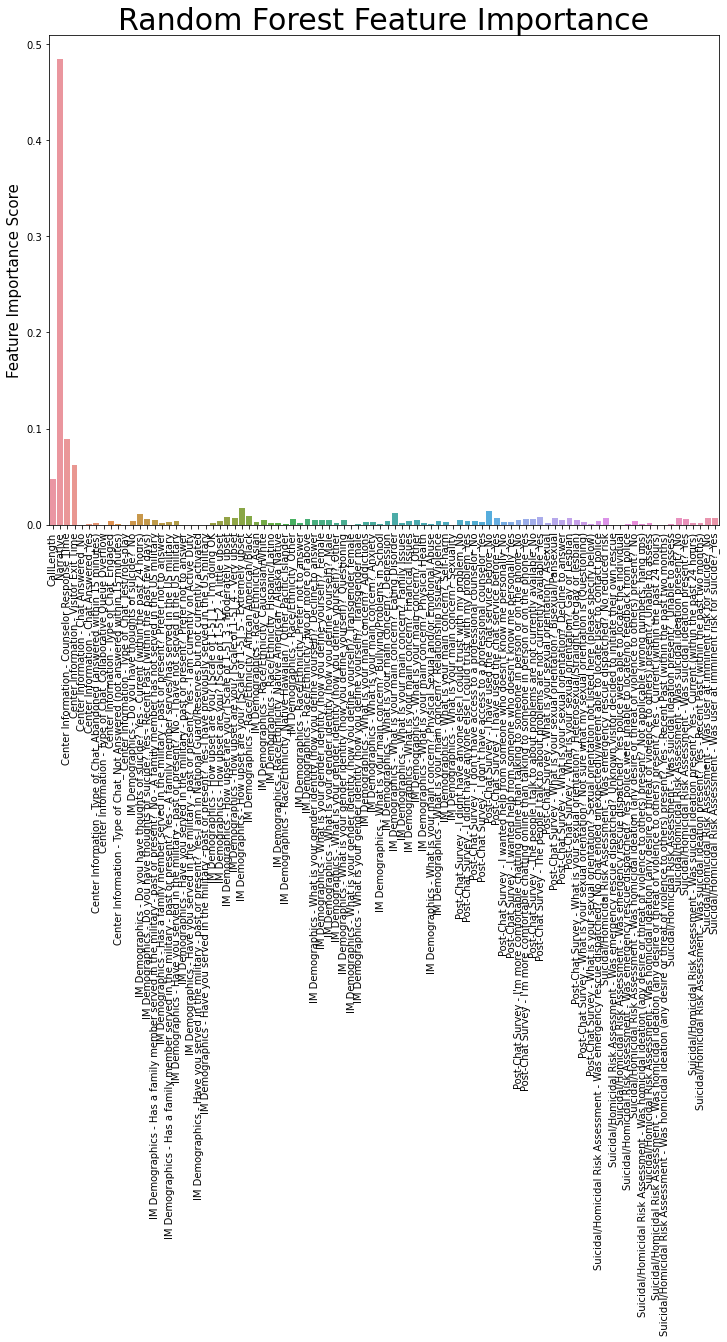

In [ ]:
# Importance scores for Features for Random Forest
importances = model.feature_importances_
rf_imp = pd.Series(importances, index = X.columns)
plt.figure(figsize = (12,9))
ax = sns.barplot(x = rf_imp.index, y = rf_imp.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('Random Forest Feature Importance', size = 30)
plt.ylabel('Feature Importance Score', size = 15)